Shape: (3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47


id                        int64
listing_url              object
scrape_id                 int64
last_scraped             object
name                     object
summary                  object
space                    object
description              object
experiences_offered      object
neighborhood_overview    object
notes                    object
transit                  object
access                   object
interaction              object
house_rules              object
dtype: object

Snapshot range: 2016-09-07 00:00:00 → 2016-09-07 00:00:00


jurisdiction_names              1.000000
license                         1.000000
neighbourhood_group_cleansed    1.000000
has_availability                1.000000
square_feet                     0.984379
monthly_price                   0.752301
weekly_price                    0.751185
security_deposit                0.625662
notes                           0.550907
interaction                     0.433473
access                          0.415342
neighborhood_overview           0.394700
host_about                      0.365132
transit                         0.359833
house_rules                     0.332497
cleaning_fee                    0.308787
space                           0.294840
review_scores_accuracy          0.229568
review_scores_location          0.229289
review_scores_value             0.229010
dtype: float64

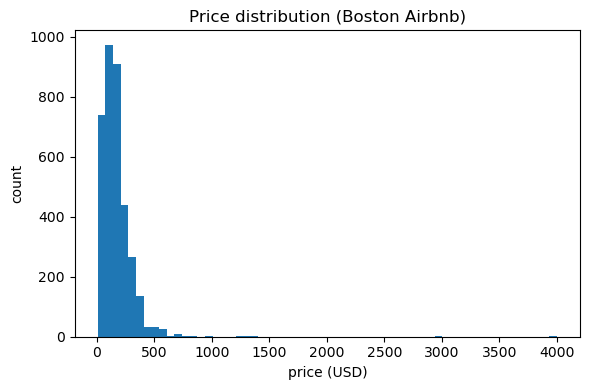

<Figure size 600x400 with 0 Axes>

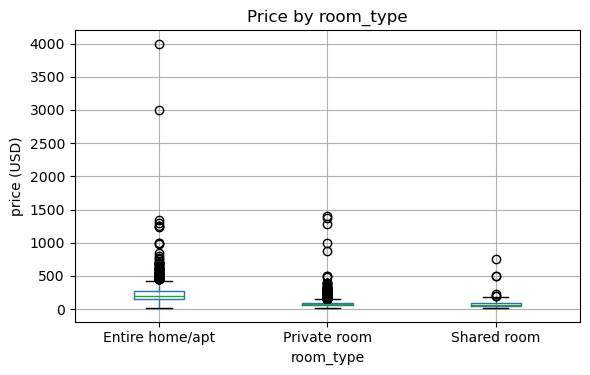

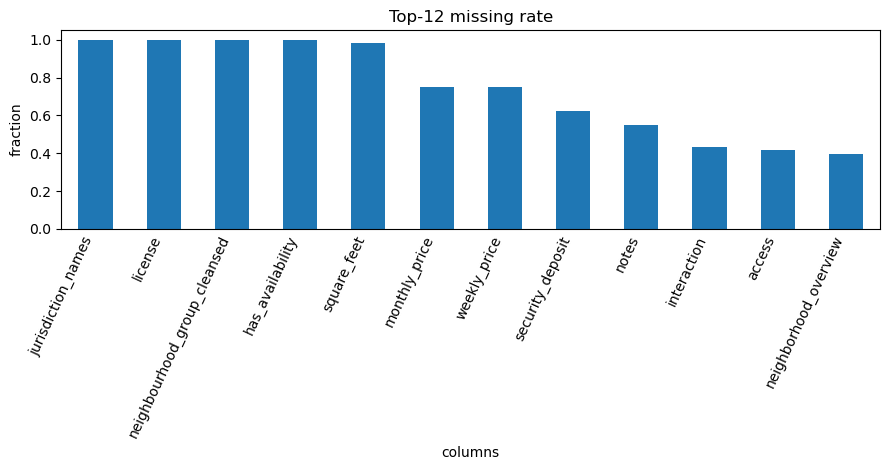

,type
price,continuous
room_type,categorical
neighbourhood_cleansed,categorical
latitude,continuous
longitude,continuous
minimum_nights,continuous
number_of_reviews,continuous
reviews_per_month,continuous
availability_365,continuous
calculated_host_listings_count,continuous


,price,room_type,neighbourhood_cleansed,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count
0,250.0,Entire home/apt,Roslindale,42.282619,-71.133068,2,0,NaN,0,1
1,65.0,Private room,Roslindale,42.286241,-71.134374,2,36,1.30,359,1
2,65.0,Private room,Roslindale,42.292438,-71.135765,3,41,0.47,319,1
3,75.0,Private room,Roslindale,42.281106,-71.121021,1,1,1.00,98,1
4,79.0,Private room,Roslindale,42.284512,-71.136258,2,29,2.25,334,1


,price_stats
count,3585.00
mean,173.93
median,150.00
std,148.33
q25,85.00
q75,220.00
min,10.00
max,4000.00


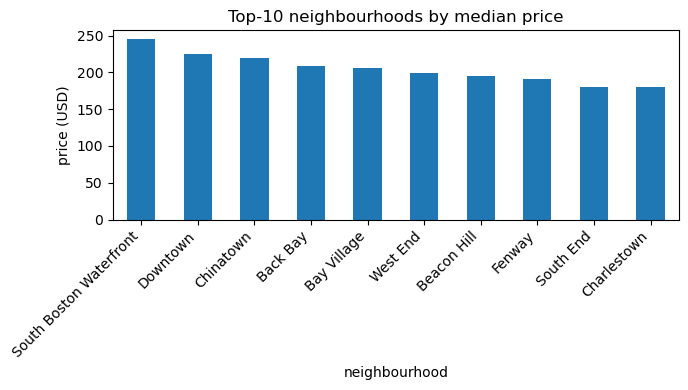

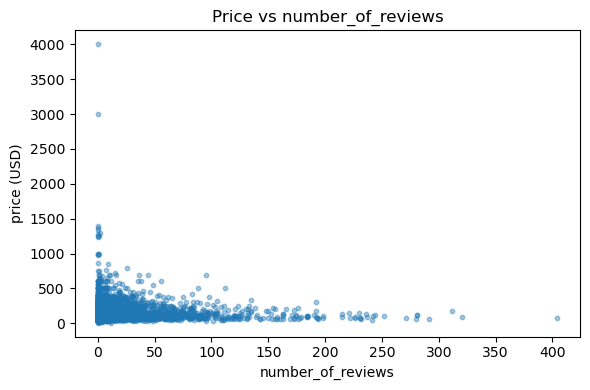

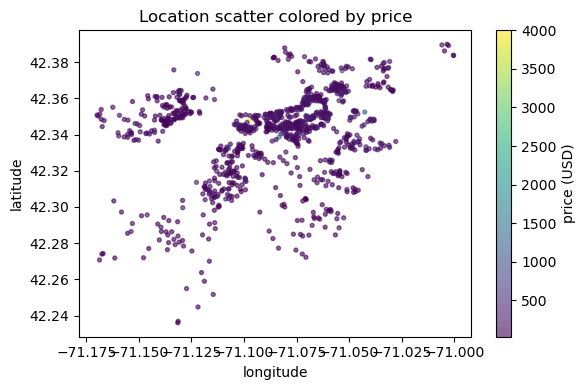

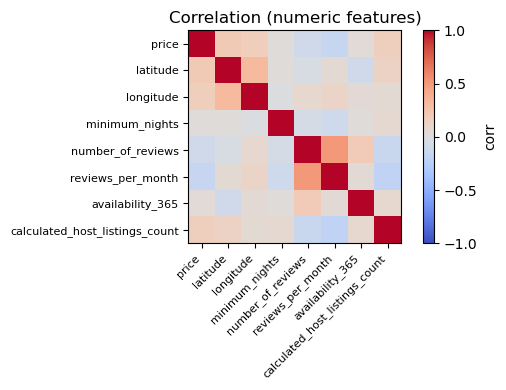

In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
plt.rcParams.update({'figure.figsize': (6,4)})

DATA = Path('..') / 'data' / 'listings.csv'
df = pd.read_csv(DATA, low_memory=False)
print('Shape:', df.shape)
display(df.head(3))
display(df.dtypes.head(15))

if 'last_scraped' in df.columns:
    d = pd.to_datetime(df['last_scraped'], errors='coerce')
    print('Snapshot range:', d.min(), '→', d.max())

def clean_price(s):
    return (s.astype(str)
             .str.replace(r'[\$,]', '', regex=True)
             .str.replace(r'\.00$', '', regex=True)
             .replace('nan', np.nan)
             .astype(float))
if 'price' in df.columns:
    df['price'] = clean_price(df['price'])

na_rate = df.isna().mean().sort_values(ascending=False)
display(na_rate.head(20))

plt.figure()
df['price'].dropna().plot(kind='hist', bins=60)
plt.title('Price distribution (Boston Airbnb)')
plt.xlabel('price (USD)')
plt.ylabel('count')
plt.tight_layout()
plt.savefig('../figures/fig1_price_hist.png', dpi=160)
plt.show()

if 'room_type' in df.columns:
    plt.figure()
    tmp = df[['room_type','price']].dropna()
    tmp.boxplot(by='room_type', column='price')
    plt.title('Price by room_type')
    plt.ylabel('price (USD)')
    plt.xlabel('room_type')
    plt.suptitle('')
    plt.tight_layout()
    plt.savefig('../figures/fig2_roomtype_box.png', dpi=160)
    plt.show()

plt.figure(figsize=(9,4.8))
ax = na_rate.head(12).plot(kind='bar')
plt.title('Top-12 missing rate')
plt.ylabel('fraction')
plt.xlabel('columns')
plt.xticks(rotation=65, ha='right', fontsize=10)
ax.tick_params(axis='x', length=0)
plt.tight_layout()
plt.savefig('../figures/fig3_missing_top.png', dpi=160)
plt.show()

keep_cols = [c for c in ['price','room_type','neighbourhood_cleansed','latitude','longitude',
                         'minimum_nights','number_of_reviews','reviews_per_month',
                         'availability_365','calculated_host_listings_count'] if c in df.columns]
def col_kind(s): return 'categorical' if s.dtype=='object' else 'continuous'
kinds = {c: col_kind(df[c]) for c in keep_cols}
display(pd.DataFrame.from_dict(kinds, orient='index', columns=['type']))

display(df[keep_cols].head())

price = df['price'].dropna()
summary = pd.Series({
    'count': price.size,
    'mean': round(price.mean(), 2),
    'median': round(price.median(), 2),
    'std': round(price.std(), 2),
    'q25': round(price.quantile(0.25), 2),
    'q75': round(price.quantile(0.75), 2),
    'min': round(price.min(), 2),
    'max': round(price.max(), 2)
})
display(summary.to_frame('price_stats'))

if 'neighbourhood_cleansed' in df.columns:
    top_med = (df[['neighbourhood_cleansed','price']]
               .dropna()
               .groupby('neighbourhood_cleansed')
               .filter(lambda x: len(x)>=20)
               .groupby('neighbourhood_cleansed')['price']
               .median()
               .sort_values(ascending=False)
               .head(10))
    ax = top_med.plot(kind='bar', figsize=(7,4), title='Top-10 neighbourhoods by median price')
    ax.set_ylabel('price (USD)'); ax.set_xlabel('neighbourhood'); plt.xticks(rotation=45, ha='right'); plt.tight_layout(); plt.show()

if {'number_of_reviews','price'} <= set(df.columns):
    tmp = df[['number_of_reviews','price']].dropna()
    plt.figure(figsize=(6,4))
    plt.scatter(tmp['number_of_reviews'], tmp['price'], s=10, alpha=0.4)
    plt.title('Price vs number_of_reviews'); plt.xlabel('number_of_reviews'); plt.ylabel('price (USD)')
    plt.tight_layout(); plt.show()

if {'latitude','longitude','price'} <= set(df.columns):
    m = df[['latitude','longitude','price']].dropna().sample(n=min(1000, df.shape[0]), random_state=0)
    plt.figure(figsize=(6,4))
    sc = plt.scatter(m['longitude'], m['latitude'], c=m['price'], s=8, alpha=0.6)
    plt.colorbar(sc, label='price (USD)')
    plt.title('Location scatter colored by price'); plt.xlabel('longitude'); plt.ylabel('latitude')
    plt.tight_layout(); plt.show()

num_cols_show = ['price','latitude','longitude','minimum_nights','number_of_reviews',
                 'reviews_per_month','availability_365','calculated_host_listings_count']
num_cols_show = [c for c in num_cols_show if c in df.columns]
corr = df[num_cols_show].corr(numeric_only=True)
plt.figure(figsize=(6,4))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='corr')
plt.xticks(range(len(num_cols_show)), num_cols_show, rotation=45, ha='right', fontsize=8)
plt.yticks(range(len(num_cols_show)), num_cols_show, fontsize=8)
plt.title('Correlation (numeric features)')
plt.tight_layout(); plt.show()
